# Viana Salsabila Fairuz Syahla
# 202231027

In [10]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

import skimage

In [11]:
daun = cv2.imread("daun.jpg",0)
tinggi, lebar = daun.shape

##### kenapa ,0?? karena dishape dibagi 3, yaitu lebar, tinggi dan layer, nah kalo ,0 itu yg digunakan cuma tinggi dan lebar. kenapa harus ada tinggi dan lebar? soalnya mau menentukan nilai ambang batas yang pas, jd itu untuk rumus mencari ambang batas


In [12]:
cv2.imshow("gambar daun", daun)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Memperkirakan nilai ambang

In [8]:
nilai_ambang = 131#inden g boleh salah!!, nilai ambang custom manual, intinya untuk bikin gambarnya full binary.
daun_hasil = daun.copy()
for x in range(tinggi):
    for y in range(lebar):
        if daun[x,y] < nilai_ambang:#jika x/tinggi dan y/lebar kurang dari nilai ambang/131
            daun_hasil[x,y]=0 #maka akan dibulatkan jadi 0
        else:
            daun_hasil[x,y]=255 #maka akan dibulatkan jadi 255

#### ini merupakan binary image manual, menggunakan perulangan sendiri untuk membuat binary dari set arraynya. 

In [9]:
cv2.imshow("gambar daun hasil", daun_hasil)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### maka gambar akan jadi binary tergantung sama nilai ambang yang kamu tentukan

In [12]:
def titeratif(image): #bikin function titeratif, tidak perlu set tipe data
    tinggi, lebar = image.shape
    t0=127 #nilai tengah untuk ambang batas
    while(True):
        rata_kiri = 0;
        rata_kanan = 0;
        jum_kiri=0;
        jum_kanan=0;
        for x in range(tinggi):
            for y in range(lebar):
                if (image[x,y] <= 127):
                    rata_kiri = rata_kiri + image[x,y]
                    jum_kiri = jum_kiri +1
                else:
                    rata_kanan = rata_kanan + image[x,y]
                    jum_kanan = jum_kanan +1
                    
        rata_kiri = rata_kiri /jum_kiri
        rata_kanan = rata_kanan /jum_kanan
        t1 = (rata_kiri +rata_kanan)/2
        if((t0-t1)<1):
            break
        t0=t1
    return round(t1)

#### bikin function titeratif untuk mencari nilai ambang batas terbaik dari image citra / otomatis.

In [13]:
titeratif (daun)

131

#### jadi hasil yang paling rapi adalah 131.

### Aras Jamak

In [29]:
jamak = cv2.imread("bentuk.jpg",0)
tinggi, lebar = jamak.shape

In [30]:
def arasjamak(image, t1,t2):
    res = image
    m,n= image.shape
    for x in range(m):
        for y in range (n):
            if (image[x,y] <= t1) or (image[x,y] >= t2) : #jika image kurang dr= t1 / lebih dr t2
                res[x,y]=0 #pixel akan dibulatkan jd 0
            else :
                res[x,y] = 255 #kalo engga pixel akan dibulatkan jd 255
    return res

#### bikin function aras jamak dengan parameter image, t1, dan t2.

In [31]:
daunarasjamak = arasjamak(jamak,185,200 ) #185= t1, 200=t2

In [32]:
cv2.imshow("gambar daun aras jamak", daunarasjamak)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Edge detection

In [13]:
image=cv2.imread("parkir.jpg")

In [14]:
cv2.imshow("gambar parkir", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges= cv2.Canny(image,100,150) # cannny fungsinya untuk mengspotlight citra dengan nilai yang berdekatannya linear/sama, parameternya untuk kasi nilai ambang.

#### yang dideteksi canny yang garis yang sejajar linear.

In [16]:
cv2.imshow("gambar parkir", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Gambar yang udah dideteksi')

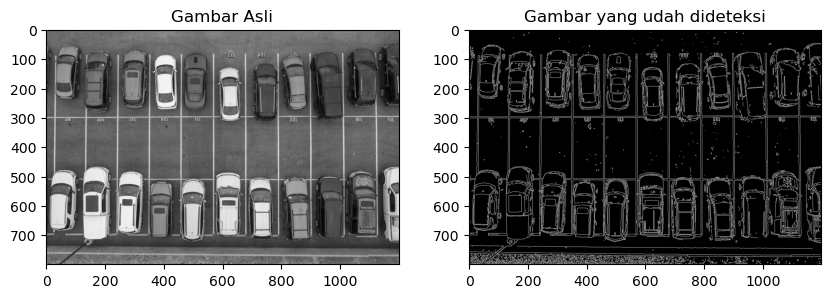

In [17]:
fig,axs = plt.subplots(1,2,figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Gambar Asli")

ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Gambar yang udah dideteksi")

In [41]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180,200, maxLineGap=250)
image_line = image.copy()

#### houghlinesp parameternya ada edges, sudut 180 dll.

In [42]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_line, (x1, y1), (x2, y2), (100, 8, 255),1)

#### displit jd x1, x2, y1, y1, lalu menggunakan line dr library cv2

Text(0.5, 1.0, 'Gambar yang udah dideteksi')

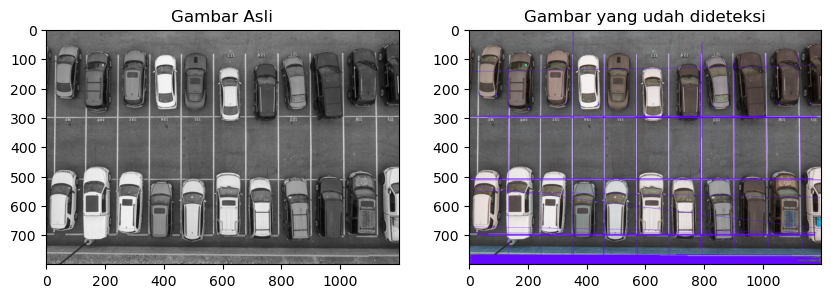

In [43]:
fig,axs = plt.subplots(1,2,figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Gambar Asli")

ax[1].imshow(image_line, cmap='gray')
ax[1].set_title("Gambar yang udah dideteksi")

Text(0.5, 1.0, 'Gambar yang udah dideteksi')

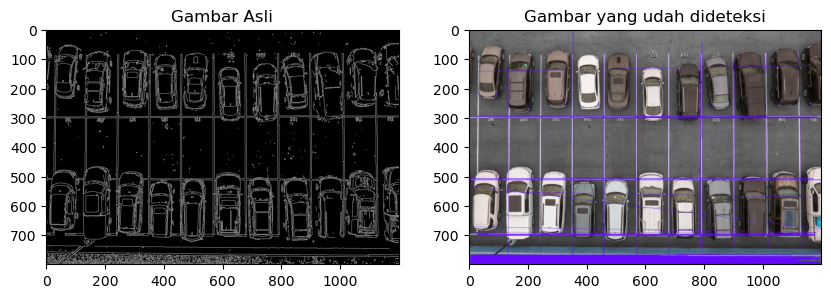

In [44]:
fig,axs = plt.subplots(1,2,figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(edges, cmap='gray')
ax[0].set_title("Gambar Asli")

ax[1].imshow(image_line, cmap='gray')
ax[1].set_title("Gambar yang udah dideteksi")

In [22]:
edges

array([[  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0, 255],
       ...,
       [  0, 255, 255, ...,   0, 255, 255],
       [255,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0]], dtype=uint8)

In [23]:
lines

array([[[ 567,  796,  567,   84]],

       [[   0,  788, 1199,  767]],

       [[   0,  298, 1183,  298]],

       ...,

       [[   0,  192, 1199,  192]],

       [[ 143,  212, 1197,  212]],

       [[   1,  191, 1198,  191]]], dtype=int32)

In [24]:
lines.shape

(545, 1, 4)

#### layer ada 4 brrti si line td.